In [1]:
from sklearn.datasets import fetch_openml
DATA_PATH='.'
x , y = fetch_openml('mnist_784', return_X_y=True , as_frame=False , data_home=DATA_PATH)

In [4]:
import torch

# device = 'mps'
x = torch.tensor(x/255, dtype=torch.float32)
y = torch.tensor(y.astype(int), dtype=torch.long)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, input_size)
        self.decoder.weight.data = (
            self.encoder.weight.data.t()
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        encoded = self.relu(self.encoder(x))
        decoded = self.sigmoid(self.decoder(encoded))
        return decoded


In [6]:
transform = transforms.Compose([transforms.ToTensor()]) 

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)

input_size = 28 * 28  
hidden_size = 64

autoencoder = Autoencoder(input_size, hidden_size)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()


num_epochs = 30

for epoch in range(num_epochs):
    for images, _ in train_loader:
        inputs = images.view(-1, input_size)
        
        outputs = autoencoder(inputs)
        
        loss = criterion(outputs, inputs)
        
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

torch.save(autoencoder.state_dict(), 'autoencoder_mnist.pth')

Epoch [1/30], Loss: 0.0281
Epoch [2/30], Loss: 0.0160
Epoch [3/30], Loss: 0.0160
Epoch [4/30], Loss: 0.0135
Epoch [5/30], Loss: 0.0138
Epoch [6/30], Loss: 0.0094
Epoch [7/30], Loss: 0.0089
Epoch [8/30], Loss: 0.0081
Epoch [9/30], Loss: 0.0059
Epoch [10/30], Loss: 0.0057
Epoch [11/30], Loss: 0.0059
Epoch [12/30], Loss: 0.0055
Epoch [13/30], Loss: 0.0054
Epoch [14/30], Loss: 0.0048
Epoch [15/30], Loss: 0.0046
Epoch [16/30], Loss: 0.0057
Epoch [17/30], Loss: 0.0044
Epoch [18/30], Loss: 0.0053
Epoch [19/30], Loss: 0.0052
Epoch [20/30], Loss: 0.0055
Epoch [21/30], Loss: 0.0048
Epoch [22/30], Loss: 0.0056
Epoch [23/30], Loss: 0.0054
Epoch [24/30], Loss: 0.0057
Epoch [25/30], Loss: 0.0052
Epoch [26/30], Loss: 0.0042
Epoch [27/30], Loss: 0.0049
Epoch [28/30], Loss: 0.0050
Epoch [29/30], Loss: 0.0049
Epoch [30/30], Loss: 0.0046


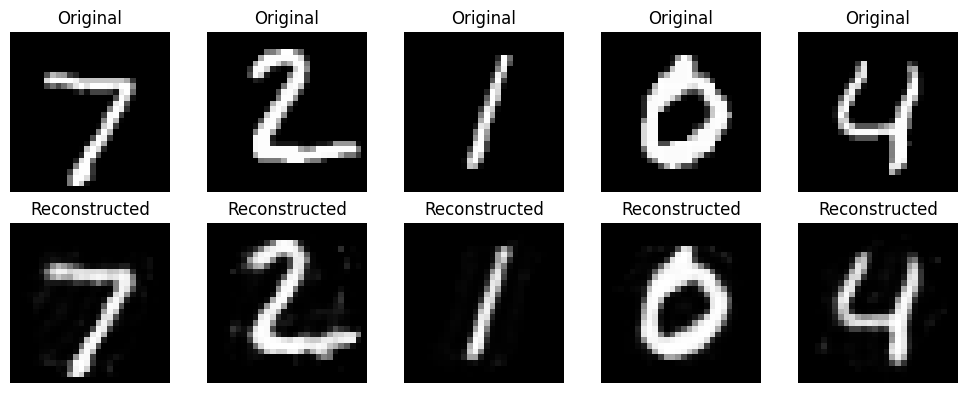

In [7]:
import torchvision
import matplotlib.pyplot as plt

def test_autoencoder():
    autoencoder.eval()

    with torch.no_grad():
        for images, _ in test_loader:
            inputs = images.view(-1, input_size)
            outputs = autoencoder(inputs)

            outputs = outputs.view(-1, 1, 28, 28)

            fig, axes = plt.subplots(2, 5, figsize=(10, 4))

            for i in range(5):
                axes[0, i].imshow(images[i].view(28, 28), cmap='gray')
                axes[0, i].axis('off')
                axes[0, i].set_title('Original')

            for i in range(5):
                axes[1, i].imshow(outputs[i].view(28, 28), cmap='gray')
                axes[1, i].axis('off')
                axes[1, i].set_title('Reconstructed')

            plt.tight_layout()
            plt.show()
            break

test_autoencoder()